In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!ls data/candles

BCCBTC-1m-data.csv.zip   ETHUSDT-1m-data.csv.zip  OAXETH-1m-data.csv.zip
BNBBTC-1m-data.csv.zip   EURBUSD-1m-data.csv.zip  OMGBTC-1m-data.csv.zip
BNBETH-1m-data.csv.zip   EURUSDT-1m-data.csv.zip  QTUMBTC-1m-data.csv.zip
BNBEUR-1m-data.csv.zip   FUNBTC-1m-data.csv.zip   QTUMETH-1m-data.csv.zip
BNTETH-1m-data.csv.zip   GASBTC-1m-data.csv.zip   SNGLSBTC-1m-data.csv.zip
BQXBTC-1m-data.csv.zip   HSRBTC-1m-data.csv.zip   SNMBTC-1m-data.csv.zip
BTCEUR-1m-data.csv.zip   IOTABTC-1m-data.csv.zip  SNTETH-1m-data.csv.zip
BTCUSDT-1m-data.csv.zip  KNCBTC-1m-data.csv.zip   STRATBTC-1m-data.csv.zip
DNTETH-1m-data.csv.zip   LRCBTC-1m-data.csv.zip   WTCBTC-1m-data.csv.zip
EOSETH-1m-data.csv.zip   LTCBTC-1m-data.csv.zip   XRPEUR-1m-data.csv.zip
ETHBTC-1m-data.csv.zip   MCOBTC-1m-data.csv.zip   YOYOBTC-1m-data.csv.zip
ETHEUR-1m-data.csv.zip   NEOBTC-1m-data.csv.zip   ZRXBTC-1m-data.csv.zip


In [3]:
data = pd.read_csv('data/candles/BTCUSDT-1m-data.csv.zip')
df = data[data.timestamp >= '2019-01-01'].copy()
df['date'] = pd.to_datetime(df.timestamp)
df.drop('timestamp', axis=1, inplace=True)
df.set_index('date', inplace=True)
df.tail()

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
date,,,,,,,,,,,
2020-07-17 20:04:00,9171.13,9172.52,9168.99,9170.44,43.084695,1595016299999,395131.912700,425,10.800535,99050.113539,0.0
2020-07-17 20:05:00,9170.43,9173.00,9170.43,9172.26,19.009847,1595016359999,174365.586480,269,5.331306,48900.687430,0.0
2020-07-17 20:06:00,9172.26,9172.31,9169.17,9170.66,26.417271,1595016419999,242250.536719,415,5.665983,51958.188113,0.0
2020-07-17 20:07:00,9170.66,9173.38,9170.20,9173.35,11.259784,1595016479999,103284.669404,293,4.588558,42089.235914,0.0
2020-07-17 20:08:00,9173.35,9173.35,9170.79,9172.35,19.813850,1595016539999,181744.137807,275,6.449489,59161.390973,0.0


In [62]:
g = df.groupby([df.index.hour, df.index.minute]).volume.mean()
g.index.names = ['hour', 'minute']
g = g.reset_index()

/Users/sebastian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


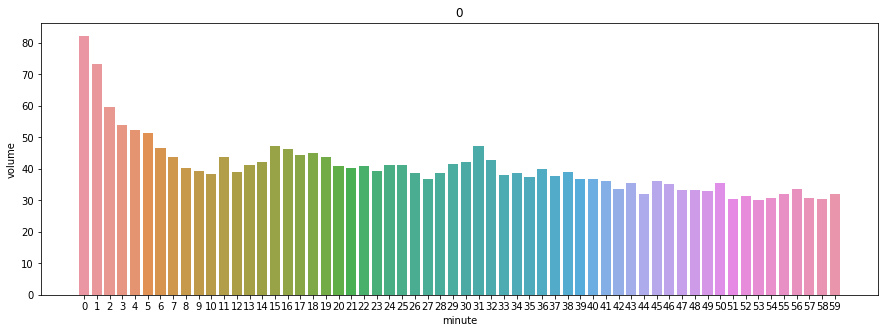

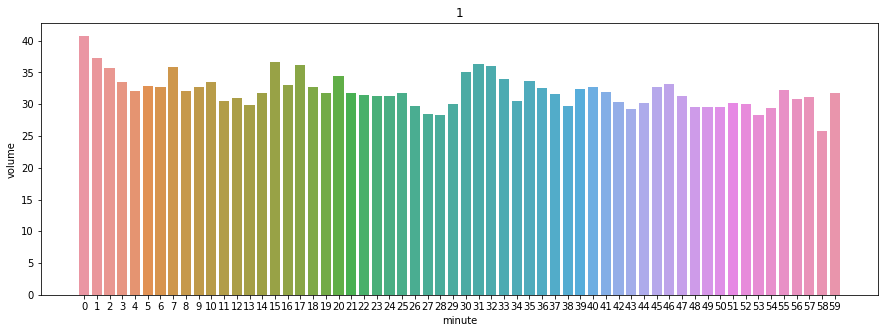

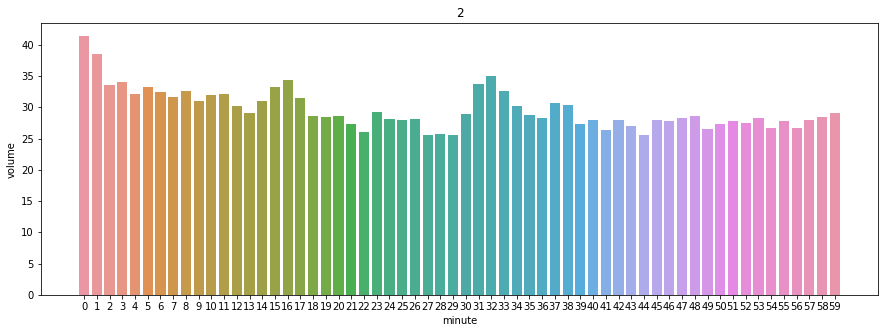

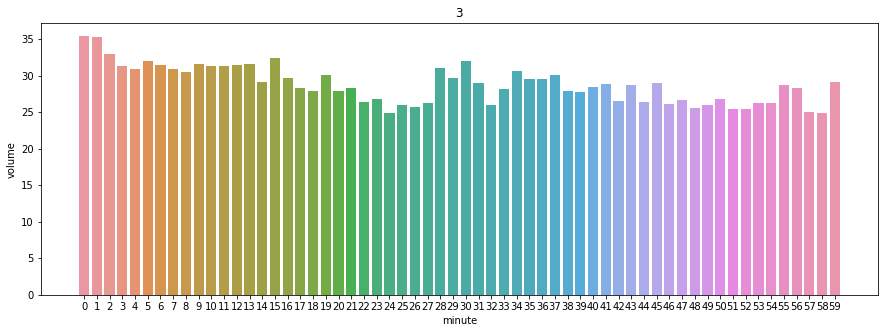

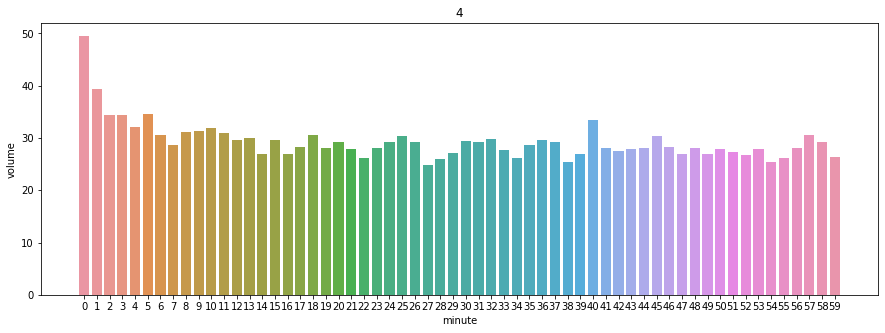

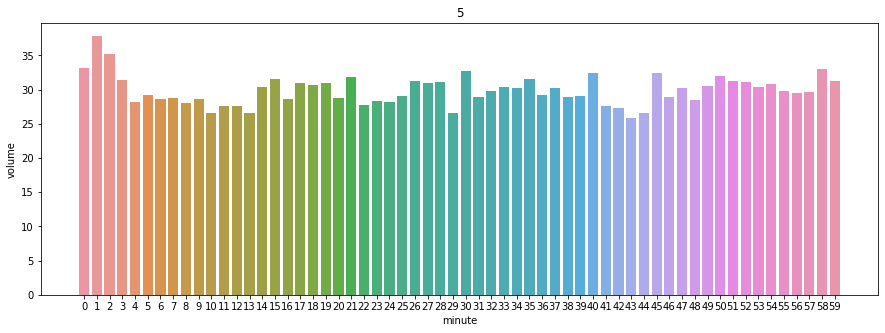

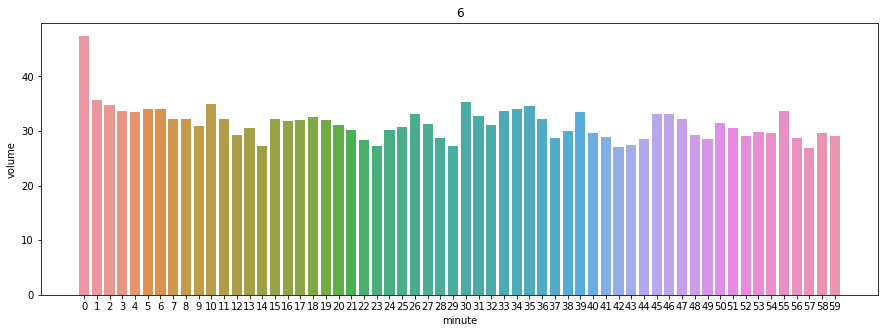

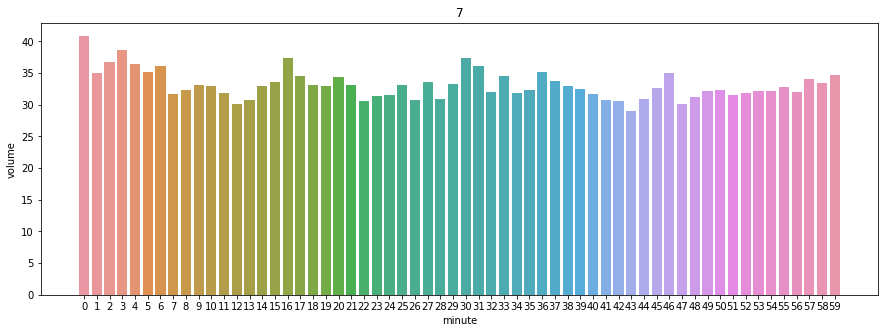

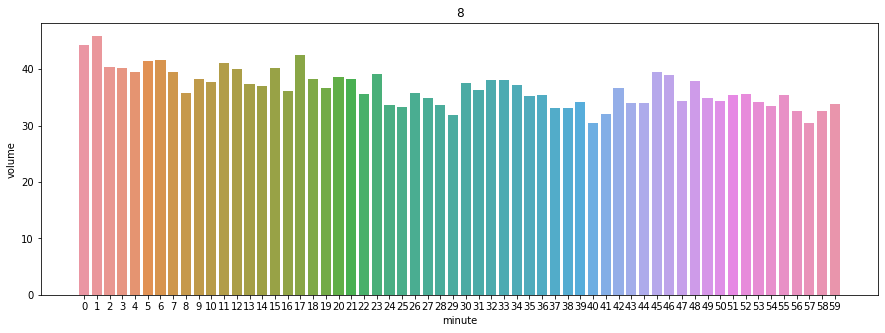

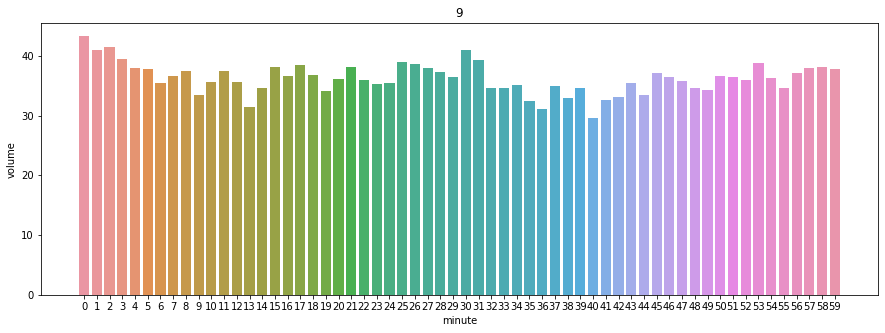

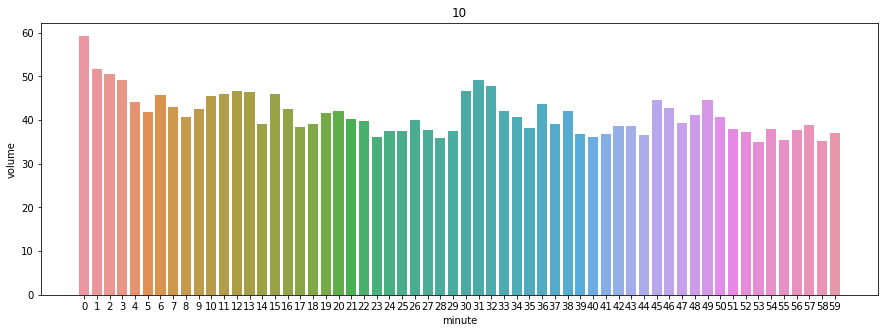

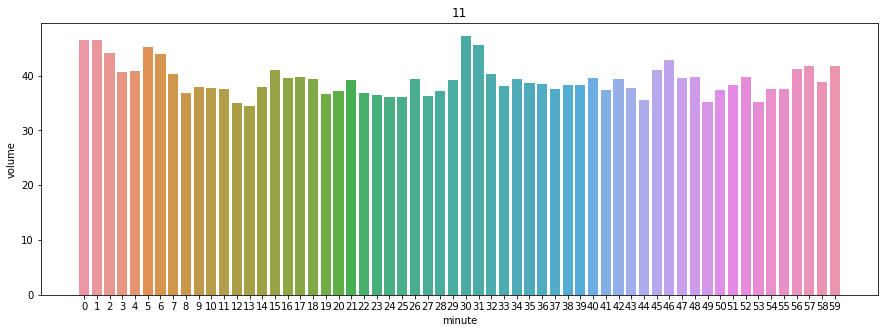

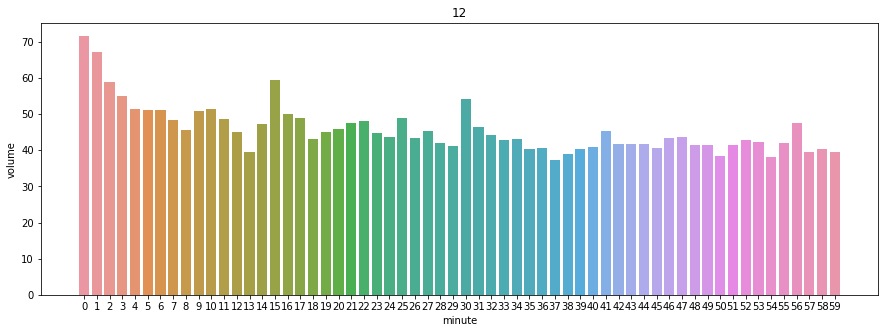

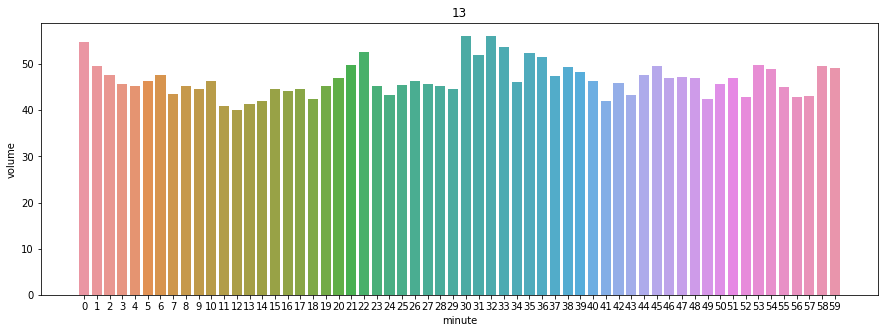

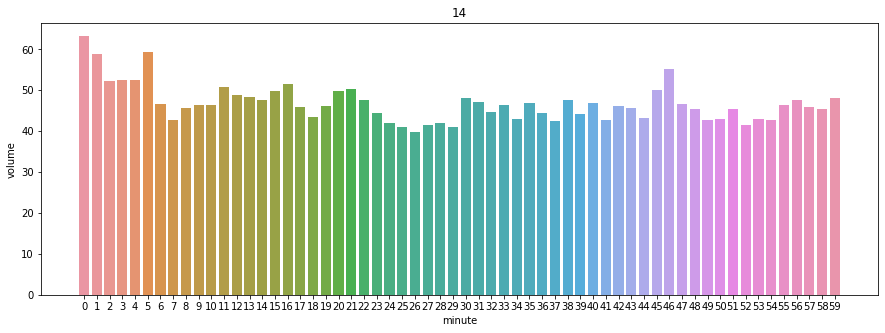

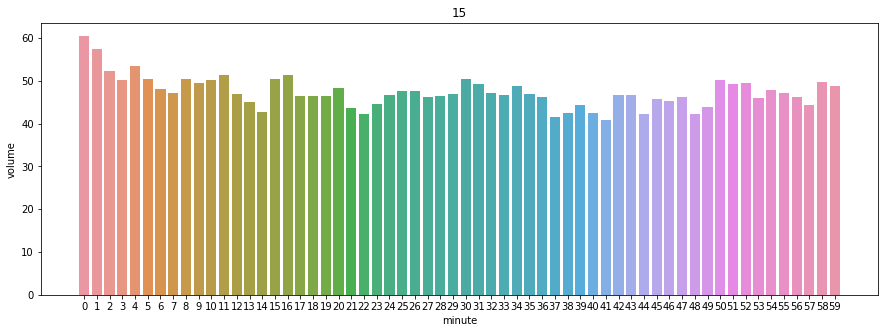

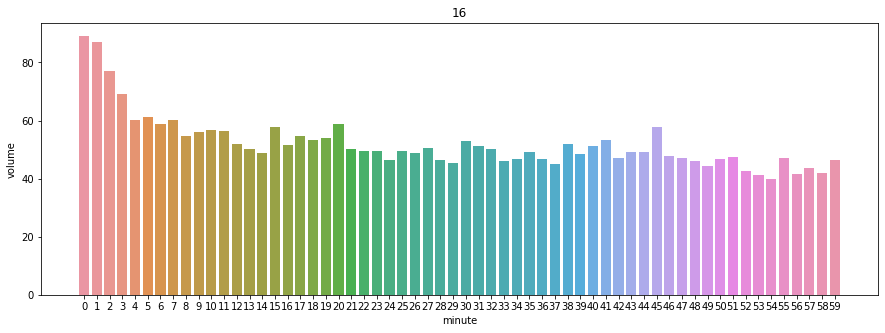

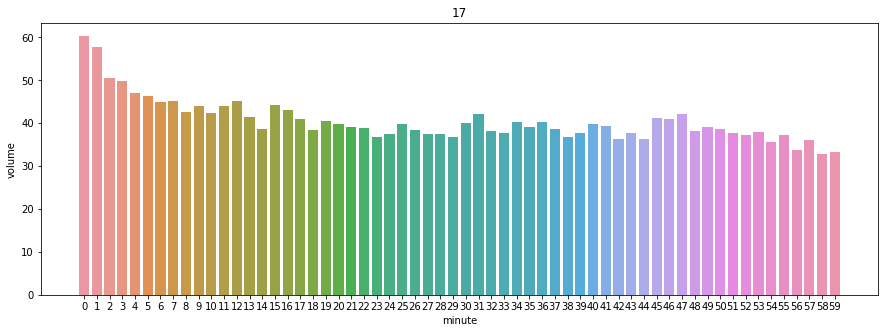

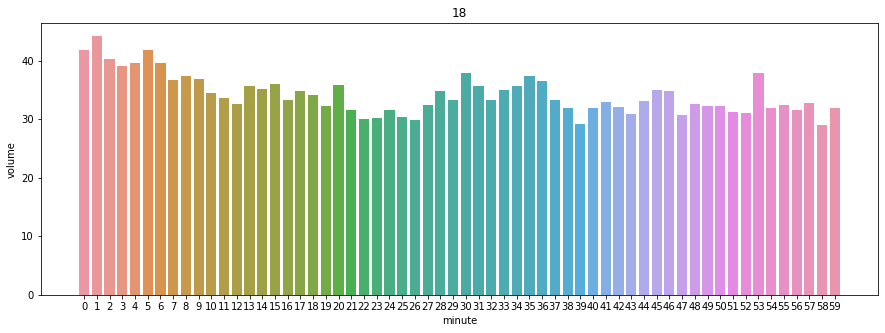

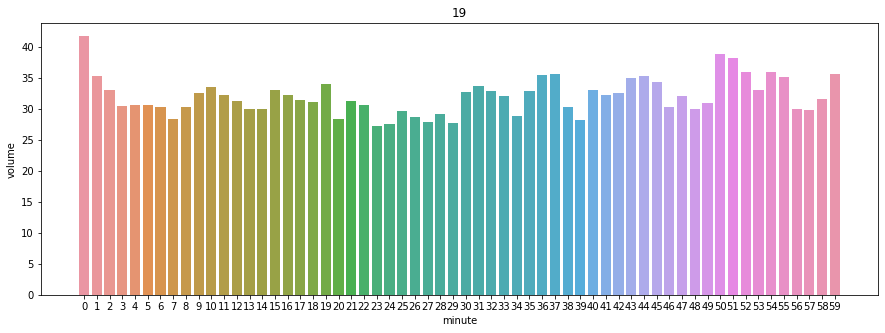

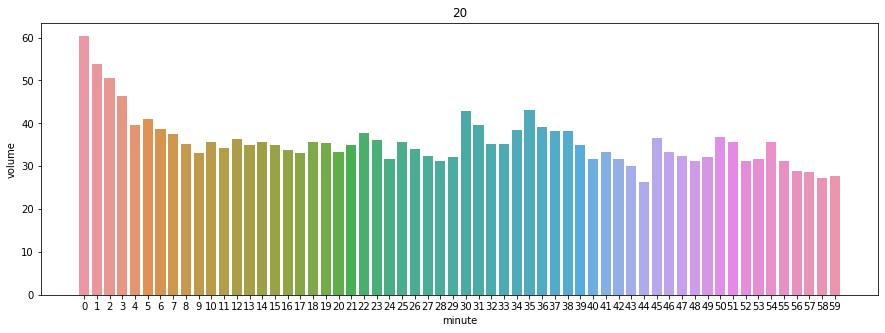

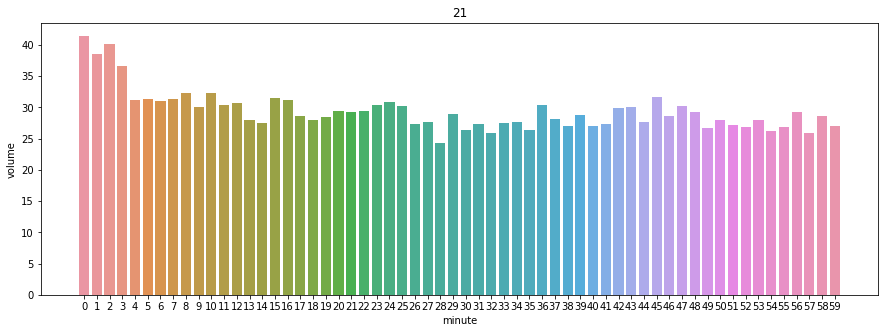

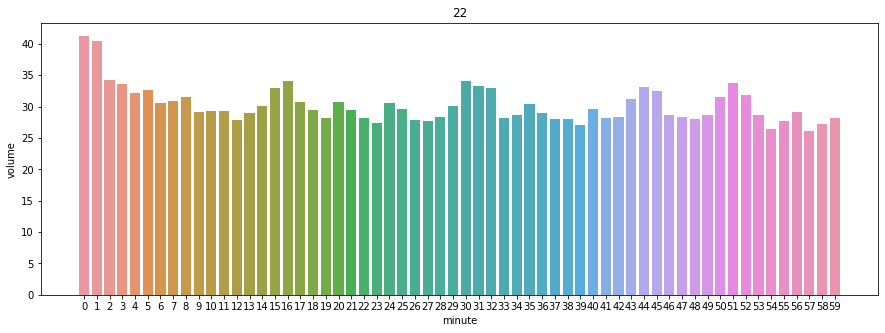

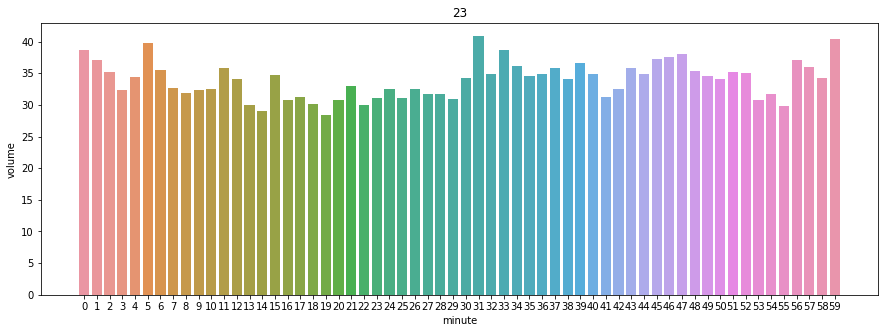

In [63]:
for h in range(24):
    pdf = g[g.hour == h]
    plt.figure(figsize=(15,5))
    plt.title(h)
    sns.barplot(pdf.minute, pdf.volume)
    plt.plot()


### Does the close price of the previous hourly candle have an effect in the in close price of the next minute candle?

In [64]:
hr = df.copy()
# hr['next_minute_close'] = hr.close.shift(-1)
# hr = hr[hr.index.minute == 0]
# hr['previous_hour_close'] = hr.close.shift(1)
# hr['delta'] = hr.close - hr.previous_hour_close
# hr['delta_minute'] = hr.next_minute_close - hr.close
# hr[['close', 'previous_hour_close', 'delta', 'next_minute_close', 'delta_minute']]
hr

,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,tb_quote_av,ignore
date,,,,,,,,,,,
2019-01-01 00:00:00,3701.23,3703.72,3701.09,3702.46,17.100110,1546300859999,63299.707312,180,5.746515,21275.695014,0.0
2019-01-01 00:01:00,3702.44,3702.63,3695.66,3697.04,23.700604,1546300919999,87681.084348,148,15.120491,55935.394905,0.0
2019-01-01 00:02:00,3699.42,3702.04,3696.08,3698.14,14.488615,1546300979999,53602.238977,80,12.700389,46990.970451,0.0
2019-01-01 00:03:00,3697.49,3698.19,3695.97,3696.51,8.499966,1546301039999,31423.283322,75,4.199726,15527.374566,0.0
2019-01-01 00:04:00,3697.20,3697.62,3695.00,3696.32,21.782886,1546301099999,80514.327585,93,15.080810,55740.503727,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-17 20:04:00,9171.13,9172.52,9168.99,9170.44,43.084695,1595016299999,395131.912700,425,10.800535,99050.113539,0.0
2020-07-17 20:05:00,9170.43,9173.00,9170.43,9172.26,19.009847,1595016359999,174365.586480,269,5.331306,48900.687430,0.0
2020-07-17 20:06:00,9172.26,9172.31,9169.17,9170.66,26.417271,1595016419999,242250.536719,415,5.665983,51958.188113,0.0


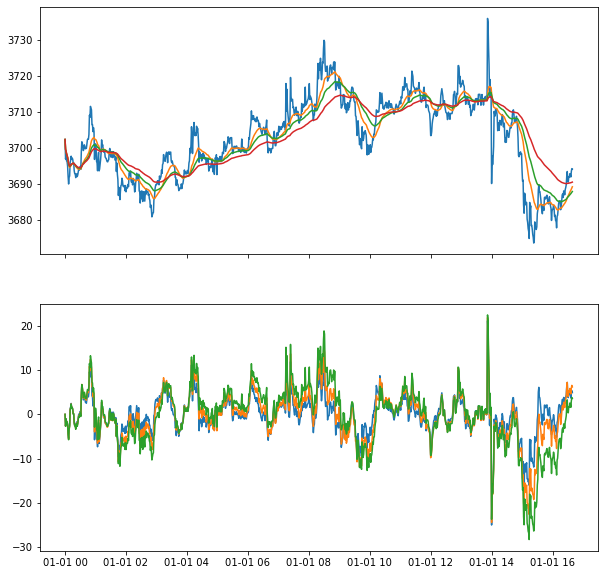

In [97]:
df2 = df[0:1000].copy()
df2['m1'] = pd.Series.ewm(df2['close'], span=32).mean()
df2['m2'] = pd.Series.ewm(df2['close'], span=64).mean()
df2['m3'] = pd.Series.ewm(df2['close'], span=128).mean()
df2['d1'] = df2.close - df2.m1
df2['d2'] = df2.close - df2.m2
df2['d3'] = df2.close - df2.m3

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,10))
ax1.plot(df2[['close', 'm1', 'm2', 'm3']])
ax2.plot(df2[['d1', 'd2', 'd3']])